<a href="https://colab.research.google.com/github/calliopz/MachineLearning/blob/master/ML_Reducao_Dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando o DataSet

In [0]:
import pandas as pd

resultados_exames = pd.read_csv("exames.csv")
resultados_exames.head()



,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [0]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
id             569 non-null int64
diagnostico    569 non-null object
exame_1        569 non-null float64
exame_2        569 non-null float64
exame_3        569 non-null float64
exame_4        569 non-null float64
exame_5        569 non-null float64
exame_6        569 non-null float64
exame_7        569 non-null float64
exame_8        569 non-null float64
exame_9        569 non-null float64
exame_10       569 non-null float64
exame_11       569 non-null float64
exame_12       569 non-null float64
exame_13       569 non-null float64
exame_14       569 non-null float64
exame_15       569 non-null float64
exame_16       569 non-null float64
exame_17       569 non-null float64
exame_18       569 non-null float64
exame_19       569 non-null float64
exame_20       569 non-null float64
exame_21       569 non-null float64
exame_22       569 non-null float64
exame_23       569 non-null float6

# Detectando valores vazios

In [0]:
# detectando os valores vazios
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [0]:
# Coluna de exame 33 tem 419 valores nulos, para um total de 569
# Isso totaliza 73% de valores nulos. O melhor a fazer é dropar essa coluna.
419/569

0.7363796133567663

# Random Forest Classifier

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)


#dropar as colunas 'id' e 'diagnostico' e atribuir as demais colunas de exames a uma variável que servirá ao x_treino
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
#atribuir a variável que determina qual o diagnóstico e que servirá ao y_treino
diagnostico = resultados_exames.diagnostico
#dropar a coluna exame 33, já que 75% dos dados são nulos
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size = 0.3)



classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))



Resultado da classificação 92.40%


In [0]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,0.2345,1.2190,1.546,18.24,0.005518,0.02178,0.02589,0.00633,0.02593,0.002157,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,0.2456,0.7339,1.667,15.89,0.005884,0.02005,0.02631,0.01304,0.01848,0.001982,12.64,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,0.06365,1.0880,1.4100,7.337,122.30,0.006174,0.03634,0.04644,0.01569,0.01145,0.005120,23.14,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.03856,0.03476,0.01616,0.02434,0.006995,16.01,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [0]:
treino_y.head()

268    B
422    B
168    M
501    M
563    M
Name: diagnostico, dtype: object

In [0]:
# Classificador bobo

from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy= "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))


Resultado da classificação boba 66.67%


In [0]:
valores_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


## Concat e Melt

Precisamos de um Data Frame com as colunas: exames, valores e diagnóstico

In [0]:
#Exemplo
#Axis = 1 - significa que é uma concatenação de colunas.
#A primeira coluna será o diagnóstico e as demais os valores dos exames

dados_plot = pd.concat([diagnostico, valores_exames_v1],axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [0]:
#Exemplo
#Função melt
#id_vars = primeira coluna
#var_name = segunda coluna
#value_name = terceira coluna

dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


## Standard Scaler

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

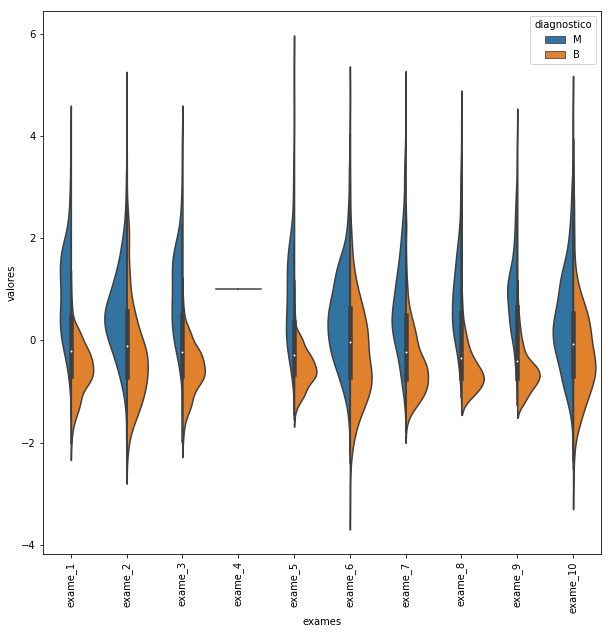

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Padronizar o eixo y, determinando um limite de valor
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
# A saída dos valores_exames_v2 será um array. Precisamos transformá-lo em um DataFrame
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns=valores_exames_v1.keys())

#Concat
#[:,0:10] = do exame 0 ao exame 10
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]],axis = 1)
#Melt
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 10))
#split=True - para dividir em benigno e maligno
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot, split= True)
#Deixar legenda na vertical
plt.xticks(rotation = 90)

C:\Users\PinkStudio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


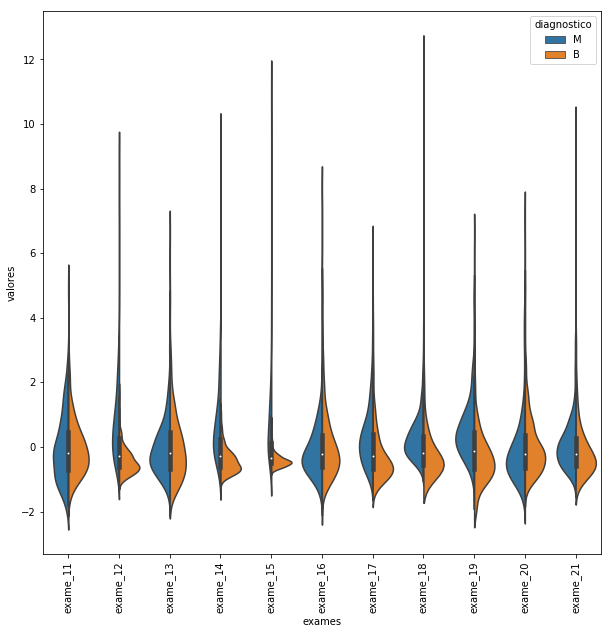

In [0]:
# Deixar o concat, melt e plot do gráfico como uma função

def grafico_violino(valores, inicio, fim):  
    
    #Concat
    #Alterar para valores e início e fim
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]],axis = 1)
    #Melt
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                        var_name="exames",
                        value_name='valores')
    plt.figure(figsize=(10, 10))
    #split=True - para dividir em benigno e maligno
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                   data = dados_plot, split= True)
    #Deixar legenda na vertical
    plt.xticks(rotation = 90)
    
# Do exame 10 ao 21   
grafico_violino(valores_exames_v2, 10, 21)

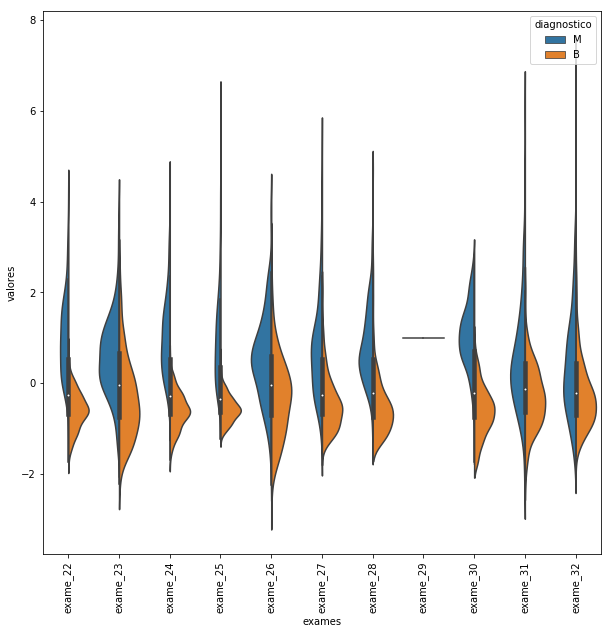

In [0]:
grafico_violino(valores_exames_v2, 21, 32)

In [0]:
# Deixar o classificador Random Forest como uma função 
#EXCLUIR os exames 4 e 29, pois eles tem valores constantes
#Redução de mais duas dimensões

valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnostico,
                                                        test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))

classificar(valores_exames_v3)

# Leve aumento na acurácia

Resultado da classificação 92.98%


## Dados Correlacionados e Mapa de Calor

In [0]:
#verificar correlação
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


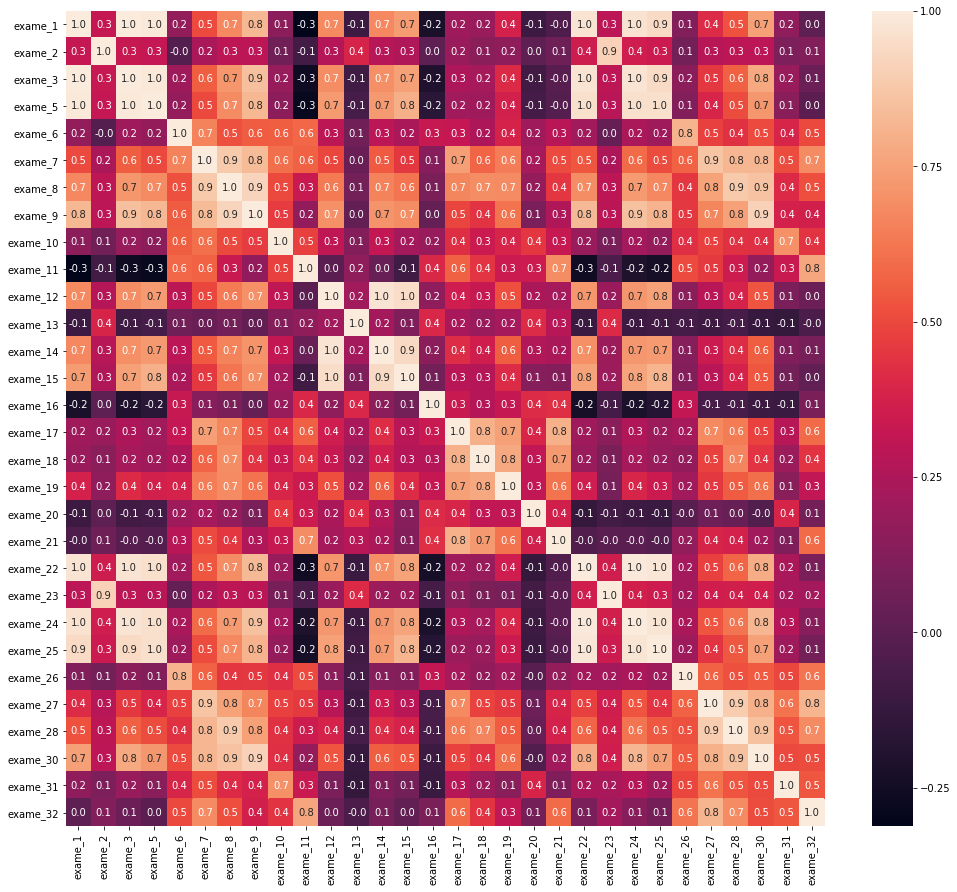

In [0]:
# Annot = em cada quadradinho vai aparecer o valor da correlação
# Fmt = para o valor da correlação ser apenas de uma casa decimal

matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [0]:
# Verificar qual coluna/variável tem correlação maior de 0.99

matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Somar os valores de correlação acima de 0.99
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [0]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [0]:
# Verificar agora qual variáveis são altamente correlacionadas

variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [0]:
# Exame 1 e exame 3 são altamente correlacionados. Excluir um deles.
# Exame 22 e exame 24 são altamente correlacionados. Excluir um deles.
# Verificar acurácia do novo Data Set

valores_exames_v4 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v4)

Resultado da classificação 92.98%


## Random Forest Classifier com Select KBest

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Chi2 - gera uma pontuação para cada feature para podermos inferir qual feature é mais representativa para o nosso processo de classificação
# K = 5 - o resultado final tem que ter apenas 5 features
# Vai selecionar as 5 melhores features
# A ideia é manter a qualidade de predição do algoritmo apenas com a análise de 5 exames
selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [0]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v4, 
                                                        diagnostico,
                                                        test_size = 0.3)



selecionar_kmelhores.fit(treino_x,treino_y)

ValueError: ignored

O erro aconteceu porque existem vários valores negativos.

Devemos voltar ao DataSet normalizado, que era o valores_exames_v1 e excluir as colunas que já foram excluídas desde então

In [0]:
valores_exames_v5 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

In [0]:
SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, 
                                                        diagnostico,
                                                        test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)
#dados de treino, selecionados apenas 5 exames
treino_kbest = selecionar_kmelhores.transform(treino_x)
#dados de teste, selecionados apenas 5 exames
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [0]:
teste_kbest.shape

(171, 5)

In [0]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_kbest,teste_y)*100))

Resultado da classificação 92.40%


In [0]:
#Reduzimos as dimensões em 85%
5/33

0.15151515151515152

## Matriz de Confusão


 

In [0]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

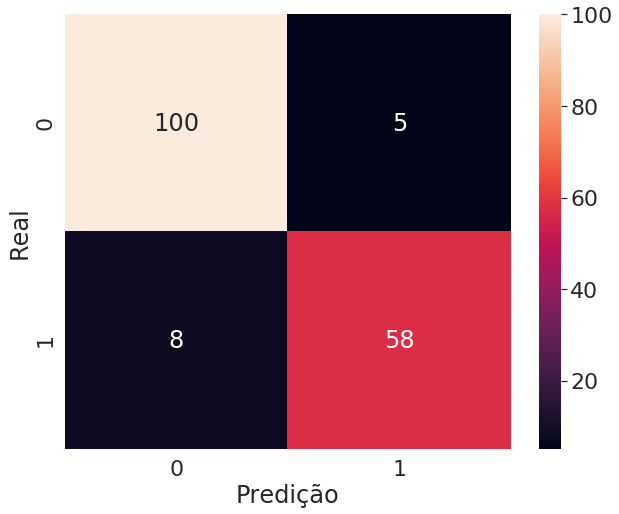

In [0]:
# Fmt = 'd' = valor inteiro

plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

Legenda: 


REAL

*   Valor 0: câncer benigno
*   Valor 1: câncer maligno



PREDIÇÃO

*   Valor 0: predição correta
*   Valor 1: predição incorreta


Ou seja:

*   de 105 casos de câncer benigno, o modelo acerta 100 e erra 5
*   de 66 casos de câncer maligno, o modelo acerta 58 e erra 8





## Rain Forest Classifier com RFE

Recursive Feature Elimination



Resultado da classificação 90.06%


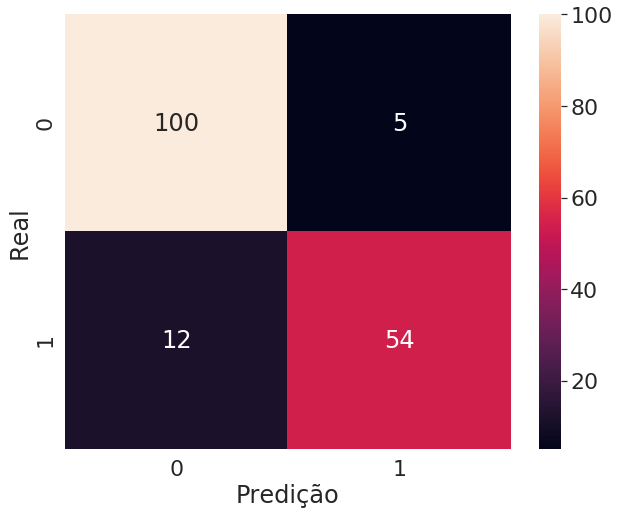

In [0]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

# Baixou a acurácia

Acerta a mesma proporção para câncer benigno, mas erra mais em caso de câncer maligno

## Rain Forest Classifier com RFECV

Recursive feature elimination and cross-validated

Resultado da classificação 94.15%


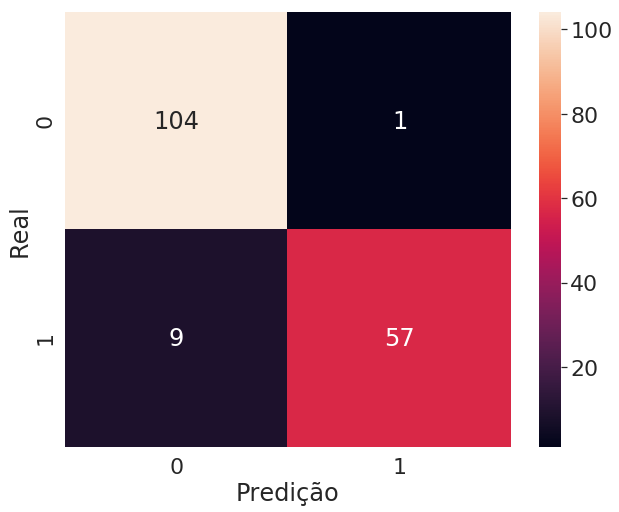

In [0]:
from sklearn.feature_selection import RFECV

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

# Aumento de acurácia

Acerta mais em casos de câncer benigno (acerta 104 e erra 1)
Erra mais em casos de câncer maligno (acerta 57 e erra 9)

In [0]:
#Selecionou 19 exames

treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_22', 'exame_23',
       'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31',
       'exame_32'],
      dtype='object')

In [0]:
# Calcular o número de features

len(selecionador_rfecv.grid_scores_)

28

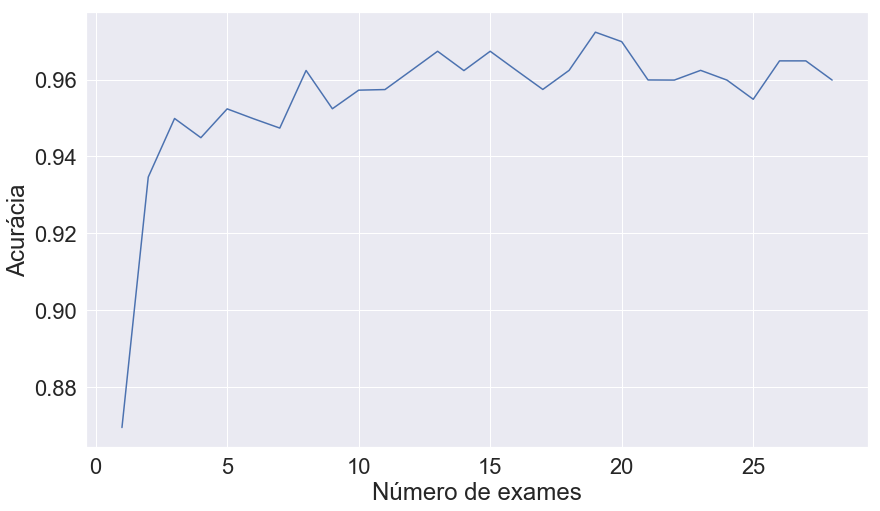

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
# O eixo x do gráfico tem que ter no mínimo o número de features do DataSet +1
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
plt.show()

In [0]:
valores_exames_v6 = selecionador_rfe.transform(valores_exames_v5)

In [0]:
valores_exames_v6.shape

(569, 5)

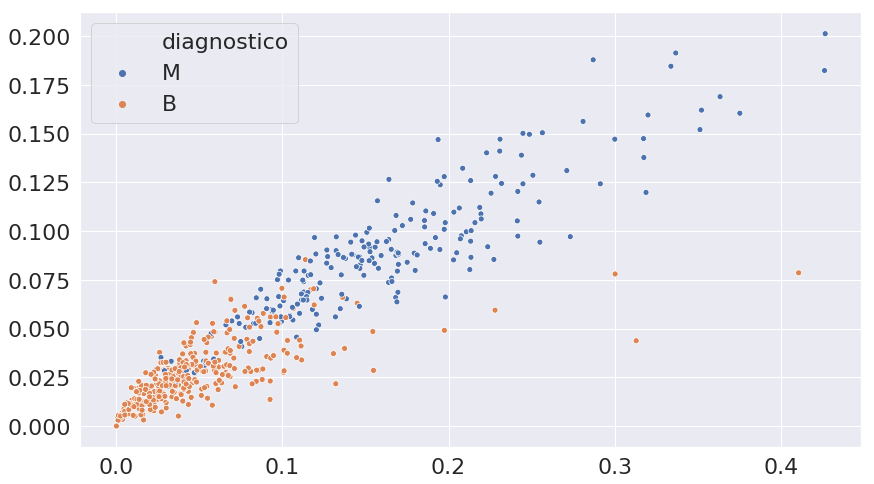

In [0]:
import seaborn as sns
plt.figure(figsize=(14,8))
#valores_exames_v6[:,0] = primeira coluna, mas todas as linhas
#valores_exames_v6[:,1] = segunda coluna, mas todas as linhas
sns.scatterplot(x = valores_exames_v6[:,0] , y = valores_exames_v6[:,1], hue = diagnostico)

## PCA

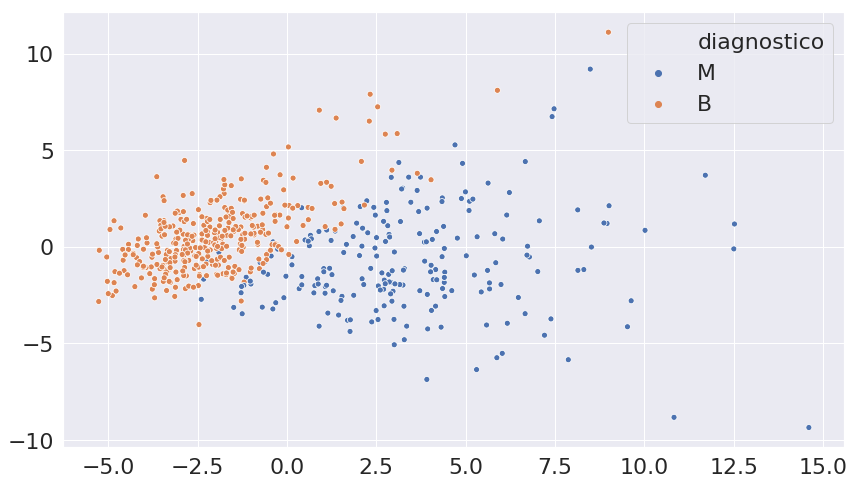

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
#aplicar o fit no v4, que é onde os dados estão normalizados
valores_exames_v7 = pca.fit_transform(valores_exames_v4)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0] , y = valores_exames_v7[:,1], hue = diagnostico)

## TSNE

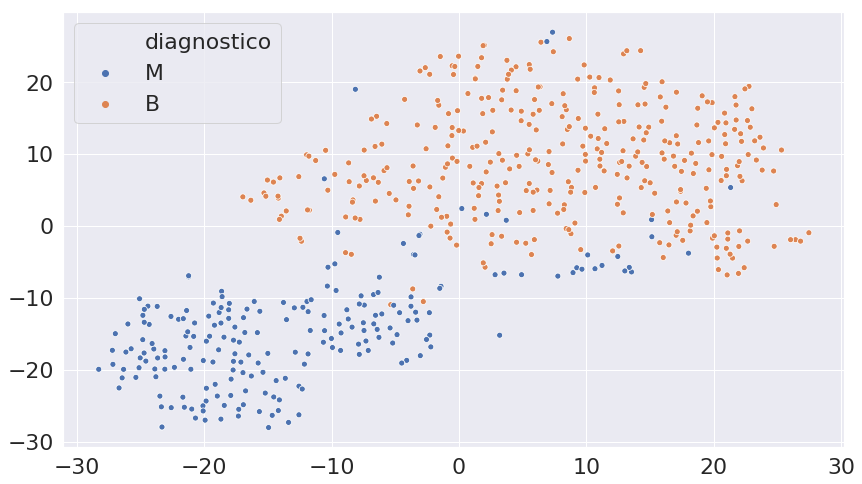

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v8 = tsne.fit_transform(valores_exames_v4)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0] , y = valores_exames_v8[:,1], hue = diagnostico)